In [1]:

# convolutional neural network from

# Nitish_Gangwar     06 Oct, 2021 
# Applying Convolutional Neural Network on mnist dataset
# https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/


# multilayer perceptron example from:
# https://valueml.com/multi-layer-perceptron-by-keras-with-example/
# Value ML    Riya Thakore  


import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from keras import backend as k

# Load MNIST data from keras, try an elaborate convolutional neural network,
# fall back on single-layer neural network from a different example when
# the loss function doesn't evaluate correctly.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   print("channels first")
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpsize = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpsize = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train = (x_train/255) 
x_test  = (x_test/255) 
Xflat = x_train.reshape((-1,28*28))
Xflat_test = x_test.reshape((-1,28*28))

In [4]:
x_train.shape, Xflat.shape

((60000, 28, 28, 1), (60000, 784))

In [5]:
y_train_hot = keras.utils.np_utils.to_categorical(y_train)
y_test_hot = keras.utils.np_utils.to_categorical(y_test)

In [6]:
inpx = Input(shape=inpsize)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [7]:
x_train.shape, y_train_hot.shape


((60000, 28, 28, 1), (60000, 10))

In [8]:
y_train_hot[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
model = Model([inpx], layer7)
model.compile(optimizer="Adadelta",
              loss="categorical_crossentropy",
              metrics=['accuracy'])
 
model.fit(x_train, y_train_hot, epochs=1, batch_size=500)

120/120 [==============================] - 116s 961ms/step - loss: 2.4736 - accuracy: 0.0981


In [10]:
ypred = model.predict(x_test)
ypred

array([[0.0483437 , 0.13561687, 0.22835918, ..., 0.05211769, 0.0475389 ,
        0.0762178 ],
       [0.04912298, 0.13322152, 0.22476593, ..., 0.05291607, 0.04737075,
        0.07819387],
       [0.04818819, 0.13549908, 0.22367458, ..., 0.05213491, 0.04635198,
        0.07688697],
       ...,
       [0.04936802, 0.13704081, 0.21673816, ..., 0.05327725, 0.04669057,
        0.07744604],
       [0.04842385, 0.13368103, 0.22139657, ..., 0.05292668, 0.04703156,
        0.07782833],
       [0.04971405, 0.13157685, 0.22192834, ..., 0.05449241, 0.04734915,
        0.07858772]], dtype=float32)

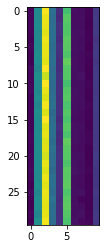

In [11]:
import matplotlib.pyplot as plt
plt.imshow(ypred[0:30,0:10])

In [12]:
score = model.evaluate(x_test, y_test_hot, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 2.450944185256958
accuracy= 0.10320000350475311


In [13]:
inpx = Input(shape=x_train.shape[1:])
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [14]:
model = Model([inpx], layer7)
model.compile(optimizer="Adadelta",
              loss="categorical_crossentropy",
              metrics=['accuracy'])
 
model.fit(x_train, y_train_hot, epochs=1, batch_size=500)

120/120 [==============================] - 172s 1s/step - loss: 2.5478 - accuracy: 0.1027


In [15]:
y_train_hot.shape

(60000, 10)

In [16]:
Xflat.shape

(60000, 784)

In [17]:
# https://valueml.com/multi-layer-perceptron-by-keras-with-example/
# Value ML    Riya Thakore  
from keras.models import Sequential

In [18]:
modelsimple = Sequential()
modelsimple.add(Dense(512, input_shape=(Xflat.shape[1],), activation='relu'))
modelsimple.add(Dense(768, activation='relu'))
modelsimple.add(Dense(10, activation='softmax'))

In [19]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [20]:
Xflat.shape, Xflat_test.shape

((60000, 784), (10000, 784))

In [21]:
Xflat.shape, y_train_hot.shape

((60000, 784), (60000, 10))

In [23]:
modelsimple.compile(optimizer='adam',loss="categorical_crossentropy" , metrics=['accuracy'])
modelsimple.fit(Xflat, y_train_hot, epochs=1)

1875/1875 [==============================] - 23s 12ms/step - loss: 0.0873 - accuracy: 0.9737


In [24]:
predictsimple = modelsimple.predict(Xflat_test)
predictsimple.shape

(10000, 10)

In [25]:
predictsimple[0,:]

array([5.4148095e-09, 3.4504700e-07, 2.9589304e-05, 1.9755647e-05,
       1.2922867e-10, 1.8261240e-08, 9.7031740e-12, 9.9994862e-01,
       3.3697606e-08, 1.6766967e-06], dtype=float32)

In [26]:
Xflat_test.shape, y_test_hot.shape, predictsimple.shape

((10000, 784), (10000, 10), (10000, 10))

In [27]:
scoresimple = modelsimple.evaluate(Xflat_test, y_test_hot, verbose=1)
scoresimple

313/313 [==============================] - 2s 6ms/step - loss: 0.0845 - accuracy: 0.9744


[0.08454757928848267, 0.974399983882904]

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictsimple, y_test_hot)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets

In [29]:
# ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets

predictsimple

array([[5.4148095e-09, 3.4504700e-07, 2.9589304e-05, ..., 9.9994862e-01,
        3.3697606e-08, 1.6766967e-06],
       [6.8653452e-09, 1.3875391e-06, 9.9999630e-01, ..., 6.4582948e-09,
        8.9985313e-08, 1.7392230e-11],
       [4.3186745e-07, 9.9477744e-01, 8.3346706e-05, ..., 3.6992887e-03,
        8.7826012e-04, 2.4761683e-05],
       ...,
       [8.6837369e-12, 1.0578580e-09, 1.8337641e-10, ..., 1.5992669e-06,
        5.4293896e-08, 2.8938855e-06],
       [2.9559703e-17, 8.0147152e-16, 4.5801875e-15, ..., 3.4619016e-14,
        6.9325781e-11, 1.0256066e-14],
       [5.5263024e-07, 4.8421812e-11, 1.2821146e-09, ..., 7.6693666e-16,
        5.1255493e-09, 1.8413829e-11]], dtype=float32)

In [30]:
call = np.equal(predictsimple ,np.dot(np.ones((10,1)) , predictsimple.max(axis=1)[np.newaxis,:] ).T )
call

array([[False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [32]:
confusion_matrix(call, y_test_hot)

ValueError: multilabel-indicator is not supported

In [31]:
# Stackoverflow....
# https://stackoverflow.com/questions/46953967/multilabel-indicator-is-not-supported-for-confusion-matrix
confusion_matrix(call.argmax(axis=1), y_test_hot.argmax(axis=1))

array([[ 974,    0,    6,    2,    2,    3,   13,    3,    7,    6],
       [   1, 1125,    3,    0,    0,    0,    2,    2,    3,    4],
       [   1,    3, 1006,    6,    5,    0,    0,    8,    5,    0],
       [   0,    1,    7,  990,    0,   10,    0,    1,   15,    7],
       [   0,    0,    0,    0,  955,    0,    2,    0,    2,   11],
       [   1,    2,    0,    5,    0,  870,    4,    0,    9,    8],
       [   1,    2,    2,    0,    4,    4,  933,    0,    3,    0],
       [   1,    0,    5,    5,    4,    0,    0, 1009,    5,    8],
       [   1,    2,    3,    2,    0,    3,    4,    0,  921,    4],
       [   0,    0,    0,    0,   12,    2,    0,    5,    4,  961]])

In [33]:
y_test_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
scoresimple

[0.08454757928848267, 0.974399983882904]

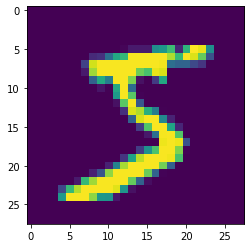

In [35]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0,:,:,0])

In [36]:
sampleimage = x_train[50,:,:,0]

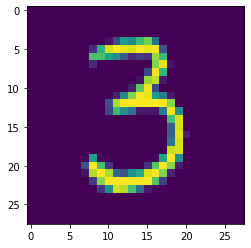

In [37]:
plt.imshow(sampleimage)

In [38]:
from scipy.optimize import minimize


In [39]:
dir(modelsimple)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

In [46]:
modelsimple.predict_proba(sampleimage.reshape(1,-1))

array([[4.1933271e-12, 1.0486989e-08, 2.0609775e-07, 9.9955219e-01,
        4.5802768e-11, 4.4674479e-04, 1.2759030e-12, 3.6853381e-10,
        2.0599538e-07, 5.7607889e-07]], dtype=float32)

In [56]:
def eight(x):
    g = modelsimple.predict_proba(sampleimage.reshape((1,-1))+x.reshape((1,-1)))
    return(g[0][7])

In [60]:
eight(initialguess.reshape((-1,1)))

2.3976684e-06

In [53]:
from numpy import random 
initialguess = random.random((28,28))

In [61]:
flatguess = initialguess.reshape((-1,1))

In [62]:
from scipy.optimize import minimize


In [66]:
fit = minimize(eight, initialguess*100)

/Applications/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [69]:
eight(initialguess*100)

0.0